# **Predicting Changes in Positive and Negative Emotions from Coronavirus-related Variables**
Lindsay Warrenburg  
lindsay.a.warrenburg@gmail.com  
Final version: December 22, 2020

### This script describes Step 1 of investigating individual differences in lockdown situations and music-related behaviors.

- A series of linear regression analyses was conducted to examine the degree to which the pandemic and lockdown measures influenced emotions
- Changes in *Negative Emotions* and *Positive Emotions* are the dependent variables
- Three different sets of predictors were used: (1) Contact with the COVID-19 Virus, (2) Work Situation due to the Pandemic, and (3) Living Situation during the Pandemic

In [1]:
import numpy as np, pandas as pd, os, sys, seaborn as sns, warnings, matplotlib.pyplot as plt, statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
plt.rcParams['figure.figsize'] = (14,4)
warnings.filterwarnings(action='ignore')
%run Coronavirus_Music_Functions.ipynb

In [2]:
all_data = pd.read_csv('factors_all_data.csv') 
all_data.rename(columns={'Demographics_General_Gender': 'Gender'}, inplace=True)
all_data.columns = all_data.columns.str.replace(r'^.*_', '', regex=True)
all_data.shape

(5113, 240)

# Pre-processing

### Impute missing values in the emotion variables with the median value for that variable, with regard to that person's country

In [3]:
neg_emotions = ['Depressed','Stressed','Anxious','Negative Valence','Lonely']
pos_emotions = ['Positive Valence','Arousal','General Health']
all_emotions = neg_emotions + pos_emotions

normalize_column = 'Country'

for i, column in enumerate(all_emotions):
    all_data[column] = all_data.groupby(normalize_column, sort = False)[column].apply(lambda x: x.fillna(x.median()))
    
all_data.reset_index(inplace = True, drop = True)

### Create lists of corona-virus related variables that we will use as the regression predictors

In [4]:
living = [c for c in all_data.columns if c.startswith('Living Situation') and 'No Response' not in c]
work = [c for c in all_data.columns if c.startswith('Ways Work Affected') and 'No Response' not in c]
covid = [c for c in all_data.columns if c.startswith('Infected with COVID') and 'No Response' not in c]

col_list = living + work + covid

all_X = all_data.loc[:,col_list]
all_X.reset_index(inplace = True, drop = True)

# **Changes in Negative Emotions**

The DV is the average of the variables referring to changes in the negative emotions during the coronavirus crisis:
- Depression
- Stress
- Anxiety
- Negative Valence
- Loneliness

In [5]:
# create average score of all negative emotions
y = (all_data.loc[:,neg_emotions]).mean(skipna=True,axis=1)

### Contact with the COVID-19 Virus

<AxesSubplot:>

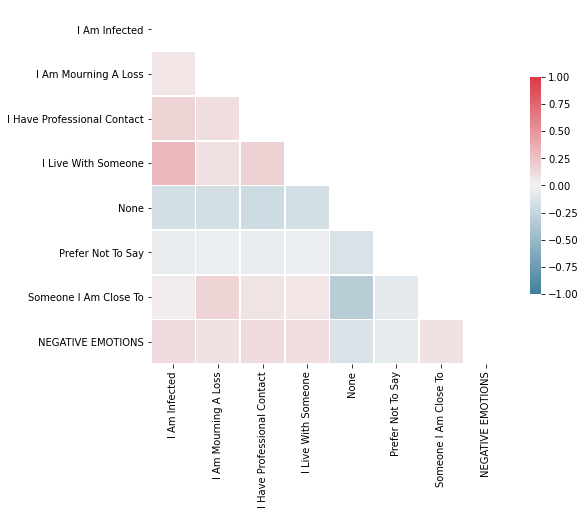

In [6]:
# correlations
data = all_X.loc[:,covid]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['NEGATIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

In [7]:
# regression
X = all_X.loc[:,covid]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     34.94
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           5.91e-48
Time:                        07:57:11   Log-Likelihood:                -8089.8
No. Observations:                5113   AIC:                         1.620e+04
Df Residuals:                    5105   BIC:                         1.625e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           4.4259      0.027    163.862      0.000       4.373       4.479
I Am Infected                   0.4204      0.091      4.609      0.000       0.242       0.599
I Am Mourning A Loss            0.2982      0.089      3.345      0.001       0.123       0.473
I Have Professional Contact     0.3584      0.075      4.806      0.000       0.212       0.505
I Live With Someone             0.3625      0.095      3.817      0.000       0.176       0.549
None                           -0.2314      0.037     -6.201      0.000      -0.305      -0.158
Prefer Not To Say              -0.3549      0.090     -3.960      0.000      -0.531      -0.179
Someone I Am Close To           0.1291      0.052      2.484      0.013       0.027       0.231
==============================================================================
Omnibus:                      257.832   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              327.685
Skew:                          -0.507   Prob(JB):                     6.98e-72
Kurtosis:                       3.715   Cond. No.                         7.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Work Situation due to the Pandemic

<AxesSubplot:>

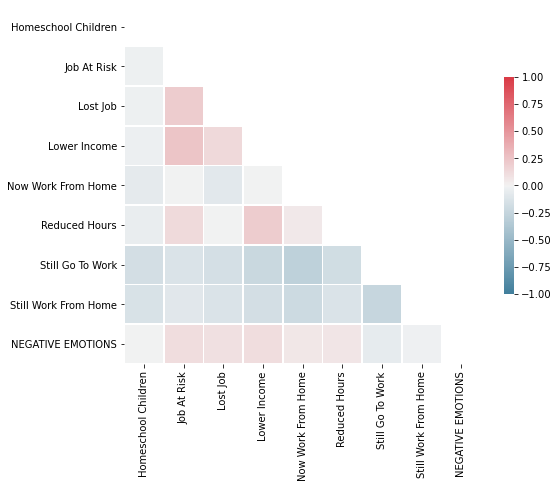

In [8]:
# correlations
data = all_X.loc[:,work]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['NEGATIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

In [9]:
# regression
X = all_X.loc[:,work]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     20.59
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           5.41e-31
Time:                        07:57:11   Log-Likelihood:                -8128.2
No. Observations:                5113   AIC:                         1.627e+04
Df Residuals:                    5104   BIC:                         1.633e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.1616      0.040    102.782      0.000       4.082       4.241
Homeschool Children      0.0624      0.058      1.078      0.281      -0.051       0.176
Job At Risk              0.3548      0.070      5.062      0.000       0.217       0.492
Lost Job                 0.3767      0.064      5.920      0.000       0.252       0.501
Lower Income             0.2733      0.048      5.737      0.000       0.180       0.367
Now Work From Home       0.2215      0.045      4.911      0.000       0.133       0.310
Reduced Hours            0.1502      0.050      2.981      0.003       0.051       0.249
Still Go To Work         0.0710      0.049      1.460      0.144      -0.024       0.166
Still Work From Home     0.1422      0.049      2.922      0.003       0.047       0.238
==============================================================================
Omnibus:                      241.327   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.769
Skew:                          -0.488   Prob(JB):                     1.09e-66
Kurtosis:                       3.689   Cond. No.                         5.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Living Situation during the Pandemic

<AxesSubplot:>

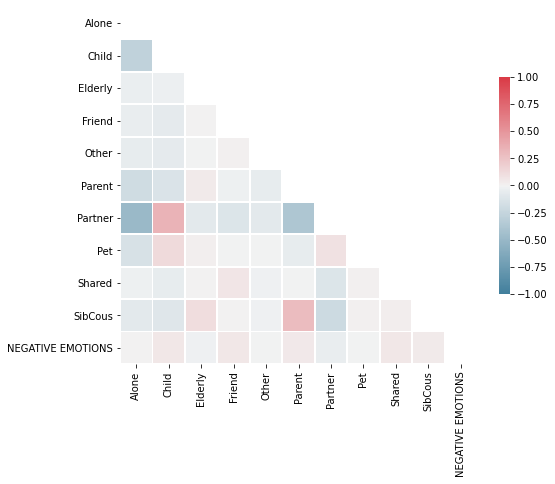

In [10]:
# correlations
data = all_X.loc[:,living]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['NEGATIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

In [11]:
# regression
X = all_X.loc[:,living]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     9.340
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           1.61e-15
Time:                        07:57:11   Log-Likelihood:                -8163.1
No. Observations:                5113   AIC:                         1.635e+04
Df Residuals:                    5102   BIC:                         1.642e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2284      0.050     83.734      0.000       4.129       4.327
Alone          0.1726      0.064      2.695      0.007       0.047       0.298
Child          0.2322      0.039      5.930      0.000       0.155       0.309
Elderly       -0.1182      0.132     -0.898      0.369      -0.376       0.140
Friend         0.6204      0.132      4.703      0.000       0.362       0.879
Other          0.0524      0.126      0.416      0.678      -0.195       0.300
Parent         0.2042      0.054      3.775      0.000       0.098       0.310
Partner        0.0048      0.050      0.096      0.924      -0.093       0.103
Pet           -0.0124      0.042     -0.295      0.768      -0.095       0.070
Shared         0.5020      0.121      4.159      0.000       0.265       0.739
SibCous        0.2208      0.088      2.501      0.012       0.048       0.394
==============================================================================
Omnibus:                      193.161   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.791
Skew:                          -0.433   Prob(JB):                     1.71e-51
Kurtosis:                       3.589   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Changes in Positive Emotions**

The DV is the average of the variables referring to changes in the positive emotions/general wellbeing during the coronavirus crisis:
- Positive Valence
- Energetic Arousal
- General Health

In [12]:
y = (all_data.loc[:,pos_emotions]).mean(skipna=True,axis=1)

### Contact with the COVID-19 Virus

<AxesSubplot:>

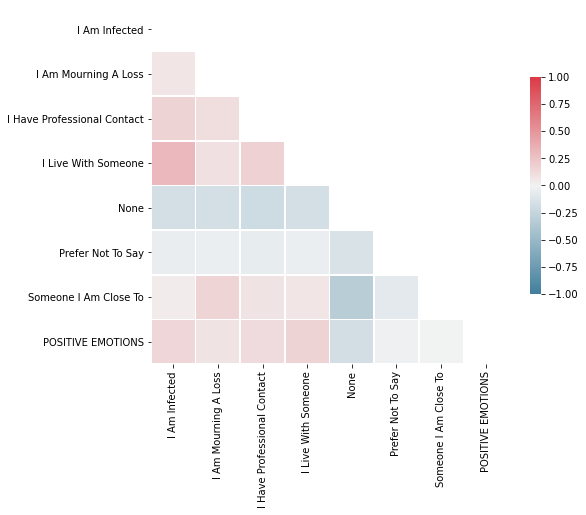

In [13]:
# correlations
data = all_X.loc[:,covid]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['POSITIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

In [14]:
# regression
X = all_X.loc[:,covid]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     52.43
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           1.30e-72
Time:                        07:57:12   Log-Likelihood:                -7506.8
No. Observations:                5113   AIC:                         1.503e+04
Df Residuals:                    5105   BIC:                         1.508e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           3.9000      0.024    161.831      0.000       3.853       3.947
I Am Infected                   0.4435      0.081      5.449      0.000       0.284       0.603
I Am Mourning A Loss            0.2496      0.080      3.137      0.002       0.094       0.406
I Have Professional Contact     0.2803      0.067      4.213      0.000       0.150       0.411
I Live With Someone             0.6388      0.085      7.539      0.000       0.473       0.805
None                           -0.3348      0.033    -10.055      0.000      -0.400      -0.270
Prefer Not To Say              -0.1358      0.080     -1.698      0.090      -0.293       0.021
Someone I Am Close To          -0.2514      0.046     -5.420      0.000      -0.342      -0.160
==============================================================================
Omnibus:                       72.504   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.373
Skew:                           0.101   Prob(JB):                     2.67e-27
Kurtosis:                       3.730   Cond. No.                         7.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Work Situation due to the Pandemic

<AxesSubplot:>

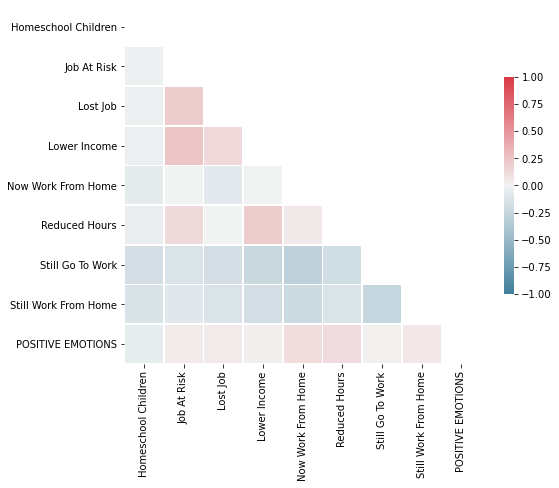

In [15]:
# correlations
data = all_X.loc[:,work]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['POSITIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

In [16]:
# regression
X = all_X.loc[:,work]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     39.70
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           6.96e-62
Time:                        07:57:12   Log-Likelihood:                -7530.0
No. Observations:                5113   AIC:                         1.508e+04
Df Residuals:                    5104   BIC:                         1.514e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.3097      0.036     91.889      0.000       3.239       3.380
Homeschool Children      0.0920      0.051      1.788      0.074      -0.009       0.193
Job At Risk              0.1094      0.062      1.754      0.079      -0.013       0.232
Lost Job                 0.3968      0.057      7.011      0.000       0.286       0.508
Lower Income             0.1133      0.042      2.673      0.008       0.030       0.196
Now Work From Home       0.5147      0.040     12.829      0.000       0.436       0.593
Reduced Hours            0.4747      0.045     10.591      0.000       0.387       0.563
Still Go To Work         0.4369      0.043     10.097      0.000       0.352       0.522
Still Work From Home     0.4938      0.043     11.408      0.000       0.409       0.579
==============================================================================
Omnibus:                      117.723   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.811
Skew:                           0.247   Prob(JB):                     1.81e-38
Kurtosis:                       3.757   Cond. No.                         5.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Living Situation during the Pandemic

<AxesSubplot:>

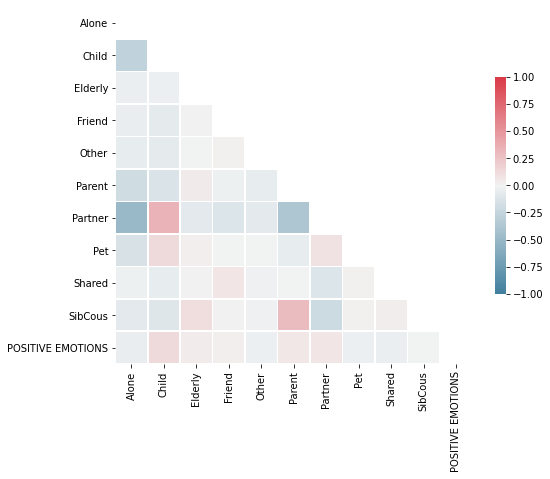

In [17]:
# correlations
data = all_X.loc[:,living]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['POSITIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

In [18]:
# regression
X = all_X.loc[:,living]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     18.21
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           3.65e-33
Time:                        07:57:13   Log-Likelihood:                -7594.6
No. Observations:                5113   AIC:                         1.521e+04
Df Residuals:                    5102   BIC:                         1.528e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4412      0.045     76.158      0.000       3.353       3.530
Alone          0.2289      0.057      3.993      0.000       0.117       0.341
Child          0.3170      0.035      9.045      0.000       0.248       0.386
Elderly        0.4024      0.118      3.418      0.001       0.172       0.633
Friend         0.4171      0.118      3.533      0.000       0.186       0.648
Other         -0.0084      0.113     -0.075      0.940      -0.230       0.213
Parent         0.3712      0.048      7.669      0.000       0.276       0.466
Partner        0.2664      0.045      5.947      0.000       0.179       0.354
Pet           -0.1012      0.038     -2.693      0.007      -0.175      -0.028
Shared        -0.1080      0.108     -1.000      0.318      -0.320       0.104
SibCous       -0.0233      0.079     -0.295      0.768      -0.178       0.132
==============================================================================
Omnibus:                      153.088   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.431
Skew:                           0.318   Prob(JB):                     1.01e-47
Kurtosis:                       3.781   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""